In [1205]:
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import scipy.stats as stats

In [1206]:
df_import=pd.read_excel(r"C:\Users\tom.whittington\PycharmProjects\pythonProject\ML\Data\AC43 Jan2018-Jul2021 Raw Data.xlsx")


In [1207]:
df_import.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Test,Appearance,File Ref,APS (d50),D10,D90,Loss at 1000,Loss USP Dental,Loss at 105,Loss at 145,pH (5%),Y Lightness,Harrison Equivalent,Ganz Whiteness,Tapped Bulk Density,Oil Adsorption (Linseed),- 45µm Wet sieve,+45µm Wet sieve,Foreign Bodies,Perspex Abrasion Value,CVP <3.95 microns,CL-PERCENT,%SO4,% Sodium Sulphate,% Sodium Chloride,NACL+NA2SO4,F-PPM,F-COMP,% SiO2 by XRF,Assay,Leachable Alumina,Alumina / ppm,MG-PPM,Fe ppm,ppm Hg,As ppm,ppm Pb (dry basis),THM,Cobalt ppm,ppm Cd,Chromium / ppm,Nickel ppm,Sb ppm,V ppm,TVC,TFC (Moulds and Yeasts),Candida albicans,E coli,Bile tolerant gram negative organisms,Staphylococcus aureaus,Pseudomonas spp.,RDA,FTIR Identity,Sulphides,QBT Water Absorption,As ppm.1,Cd ppm,Co ppm,Hg ppm,Ni ppm,Pb ppm,V ppm.1,Fail Batch ?,Failure Comment,APS (d50) Malvern 2000,D10 (Malvern 2000),D90 (Malvern 2000),colour,% Transmission @1.448 RI,% Transmission @ 1.454 RI,Solution 1 - RI,Solution 1 - %Tr,Solution 2 - RI,Solution 2 - %Tr,Solution 3 - RI,Solution 3 - %Tr,Solution 4 - RI,Solution 4 - %Tr,Peak - RI,Peak - %Tr,ppm Hg (dry basis),Acid soluble Cd,Acid soluble Cr,Acid soluble Co,Acid soluble Ni,Acid soluble Sb,Mercury,+250 Wet Sieve,Viscosity 10% Slurry,% Transmission @1.440 RI,% Transmission @1.446 RI,SO4 + CL,BDL,+180µm dry sieve,Oil Adsorption (GSK),% Transmission @1.437 RI,% Transmission @1.443 RI,Surface Area Tristar,Surface Area,Pore Volume,APD,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134
0,NaN,NaN,NaN,Spec,MAX,NaN,NaN,4.2,2.4,10,25,8.3,5,5,7.5,NaN,NaN,NaN,NaN,80,NaN,0.5,5,33,NaN,0.1,0.5,4,NaN,2,30,NaN,NaN,100.5,0.1,900,150,350,1,1.5,4.5,15,1,0.5,4,1.5,5,10,100,70,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN,30,1.5,0.5,5,3,20,0.5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,MIN,NaN,NaN,2.9,0.9,5.3,NaN,NaN,NaN,NaN,6,87,NaN,93.0,250,50,98,NaN,NaN,16,42,NaN,NaN,NaN,NaN,NaN,NaN,93,99,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Text,PASS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,COMPLIES,PASS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Product,Date,Lot,Pallet,-,-,µm,-,-,%,%,%,%,-,-,-,NaN,-,g / 100g,%,%,-,-,%,%,%,%,%,%,ppm,%,%,%,%,ppm,-,ppm,ppm,ppm,ppm,ppm,ppm,ppm,ppm,ppm,ppm,ppm,cfu/g,cfu/g,-,NaN,-,NaN,cfu/g,-,-,-,ml/20g,ppm,ppm,ppm,ppm,ppm,ppm,ppm,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,SORB-AC43,2018-01-01 07:00:00,MR18040,1,PASS,NaN,NaN,NaN,NaN,6.8,5.9,0.9,1.7,7.2,92.639999,100,NaN,335,62,99.999001,0.001,1,21.1,50.200001,0.01,0.05,0.0

In [1208]:
df=df_import[3:]


In [1209]:
df.rename(columns={"Unnamed: 1" : "Product", "Unnamed: 2" : "Date", "Unnamed: 3": "Lot", "Test":"Pallet", "Tapped Bulk Density": "TBD", "Oil Adsorption (Linseed)": "OA", "Perspex Abrasion Value" : "PAV"}, inplace=True)

In [1210]:
df=df.iloc[1:]


In [1211]:
df["Date"]=pd.to_datetime(df["Date"])


In [1212]:
df.drop(columns="Unnamed: 0", inplace=True, axis=1)

In [1213]:
df=df[["Product", "Date", "Lot", "Pallet", "TBD", "OA", "PAV"]]

df.dropna(subset=["TBD"], how="any", inplace=True)
df[["TBD","PAV", "OA"]]=df[["TBD","PAV", "OA"]].astype(float)
df.dtypes

Product            object
Date       datetime64[ns]
Lot                object
Pallet             object
TBD               float64
OA                float64
PAV               float64
dtype: object

In [1214]:
outlier=(df["TBD"] < 1000) & (df["OA"] < 74)
df=df[outlier]

df["OA"]=df["OA"]+ np.random.normal(0, 2, size=len(df["OA"]))
# df["PAV"]=df["PAV"]+ np.random.normal(0, 2, size=len(df["PAV"]))


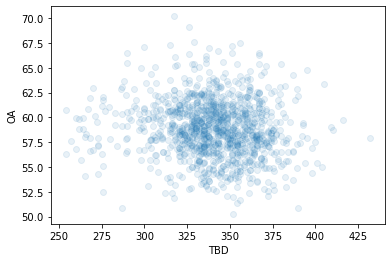

In [1215]:
plt.scatter(df["TBD"], df["OA"], alpha=0.1)
plt.xlabel("TBD")
plt.ylabel("OA")
plt.show()

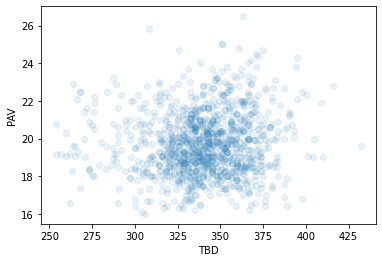

In [1216]:
plt.scatter(df["TBD"], df["PAV"], alpha=0.1)
plt.xlabel("TBD")
plt.ylabel("PAV")
plt.show()

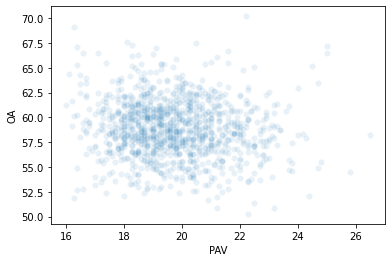

In [1217]:
sns.scatterplot(x="PAV", y="OA", data=df, alpha=0.1)
plt.xlabel("PAV")
plt.ylabel("OA")
plt.show()

In [1218]:
X=df[["OA","PAV"]]
y=df["TBD"]

regr=linear_model.LinearRegression()
regr.fit(X,y)
regr.coef_

array([-0.76841515,  1.20261002])

<AxesSubplot:xlabel='OA', ylabel='TBD'>

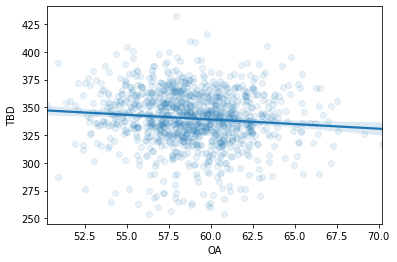

In [1219]:
X=np.array(df["OA"]).reshape(-1,1)
y=df["TBD"]

# regr=linear_model.LinearRegression()
# regr.fit(X,y)
# regr.coef_
sns.regplot(x="OA", y="TBD", data=df, scatter_kws={'alpha':0.1})

<AxesSubplot:xlabel='PAV', ylabel='TBD'>

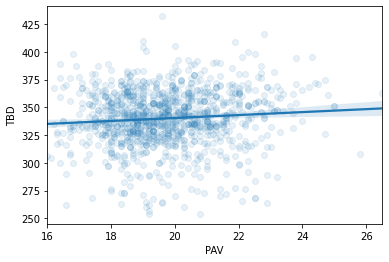

In [1220]:
X=np.array(df["PAV"]).reshape(-1,1)
y=df["TBD"]

regr=linear_model.LinearRegression()
regr.fit(X,y)
regr.coef_
sns.regplot(x="PAV", y="TBD", data=df, scatter_kws={'alpha':0.1})

<AxesSubplot:xlabel='PAV', ylabel='OA'>

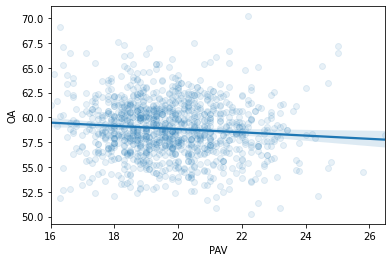

In [1221]:
X=np.array(df["PAV"]).reshape(-1,1)
y=df["OA"]

regr=linear_model.LinearRegression()
regr.fit(X,y)
regr.coef_
sns.regplot(x="PAV", y="OA", data=df, scatter_kws={'alpha':0.1})

In [1222]:
df["OA"]=stats.zscore(df["OA"])
df["PAV"]=stats.zscore(df["PAV"])
df["TBD"]=stats.zscore(df["TBD"])

<AxesSubplot:xlabel='OA', ylabel='TBD'>

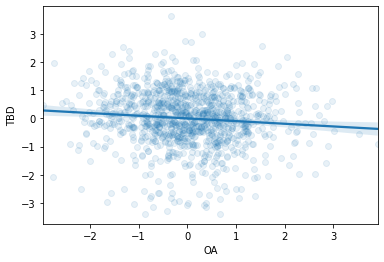

In [1223]:
sns.regplot(x="OA", y="TBD", data=df, scatter_kws={'alpha':0.1})

<AxesSubplot:xlabel='PAV', ylabel='TBD'>

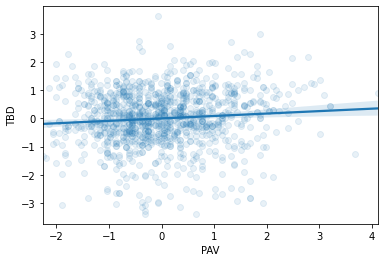

In [1224]:
sns.regplot(x="PAV", y="TBD", data=df, scatter_kws={'alpha':0.1})

<AxesSubplot:xlabel='PAV', ylabel='OA'>

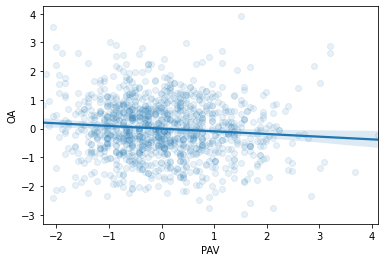

In [1225]:
sns.regplot(x="PAV", y="OA", data=df, scatter_kws={'alpha':0.1})

In [1226]:
X=df[["OA","PAV"]]
y=df["TBD"]

regr=linear_model.LinearRegression()
regr.fit(X,y)
regr.coef_

array([-0.08781131,  0.07819404])